# AMEX EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 🍙 Load Data

## Data
The dataset contains aggregated profile features for each customer at each statement date. Features are anonymized and normalized, and fall into the following general categories:

D_* = Delinquency variables  
S_* = Spend variables  
P_* = Payment variables  
B_* = Balance variables  
R_* = Risk variables  
with the following features being categorical:
['B_30', 'B_38', 'D_114', 'D_116', 'D_117', 'D_120', 'D_126', 'D_63', 'D_64', 'D_66', 'D_68']


데이터셋이 너무 크기에, @munumbutt's의 [AMEX-feather-Dataset](https://www.kaggle.com/datasets/munumbutt/amexfeather)을 사용하자.
유의할점은 부동소수점 정밀도가 64bit에서 16bit로 바뀌었다는 것이다.



In [2]:
train_data = pd.read_feather('../input/amexfeather/train_data.ftr')
test_data = pd.read_feather('../input/amexfeather/test_data.ftr')

In [3]:
train_data.head()

,customer_ID,S_2,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,...,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145,target
0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-03-09,0.938477,0.001734,0.008728,1.006836,0.009224,0.124023,0.008774,0.004707,...,NaN,NaN,0.002426,0.003706,0.003819,NaN,0.000569,0.000610,0.002674,0
1,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-04-07,0.936523,0.005775,0.004925,1.000977,0.006153,0.126709,0.000798,0.002714,...,NaN,NaN,0.003956,0.003166,0.005032,NaN,0.009575,0.005493,0.009216,0
2,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-05-28,0.954102,0.091492,0.021652,1.009766,0.006817,0.123962,0.007599,0.009422,...,NaN,NaN,0.003269,0.007328,0.000427,NaN,0.003429,0.006985,0.002604,0
3,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-06-13,0.960449,0.002455,0.013687,1.002930,0.001372,0.117188,0.000685,0.005531,...,NaN,NaN,0.006119,0.004517,0.003201,NaN,0.008423,0.006527,0.009598,0
4,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-07-16,0.947266,0.002483,0.015190,1.000977,0.007607,0.117310,0.004654,0.009308,...,NaN,NaN,0.003672,0.004944,0.008888,NaN,0.001670,0.008125,0.009827,0


In [4]:
test_data.head()

,customer_ID,S_2,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,...,D_136,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145
0,00000469ba478561f23a92a868bd366de6f6527a684c9a...,2019-02-19,0.631348,0.001912,0.010727,0.814453,0.007545,0.168701,0.009972,0.002348,...,NaN,NaN,NaN,NaN,0.004669,NaN,NaN,NaN,0.008278,NaN
1,00000469ba478561f23a92a868bd366de6f6527a684c9a...,2019-03-25,0.586914,0.005276,0.011024,0.811035,0.001817,0.241333,0.000166,0.009132,...,NaN,NaN,NaN,0.000142,0.004940,0.009018,NaN,0.003695,0.003754,0.001460
2,00000469ba478561f23a92a868bd366de6f6527a684c9a...,2019-04-25,0.608887,0.003326,0.016388,1.004883,0.000114,0.267090,0.004196,0.004192,...,NaN,NaN,NaN,0.000074,0.002113,0.004658,NaN,0.003155,0.002155,0.006481
3,00000469ba478561f23a92a868bd366de6f6527a684c9a...,2019-05-20,0.614746,0.009064,0.021667,0.816406,0.009720,0.188965,0.004124,0.015327,...,NaN,NaN,NaN,0.004742,0.006393,0.002890,NaN,0.006042,0.005207,0.007858
4,00000469ba478561f23a92a868bd366de6f6527a684c9a...,2019-06-15,0.591797,0.238770,0.015930,0.810547,0.002026,0.180054,0.000731,0.011284,...,NaN,NaN,NaN,0.008133,0.004330,0.008385,NaN,0.001008,0.007420,0.009468


train_data의 target colum은 train_labels.csv의 customer_ID의 정보와 같다. 원래(train_data.csv)는 없는 열이나, 편의상 붙여놓았다.

In [5]:
print("Train statement dates: ", train_data.S_2.min(), train_data.S_2.max(), train_data.S_2.isna().any())
print("Test statement dates: ", test_data.S_2.min(), test_data.S_2.max(), test_data.S_2.isna().any())

Train statement dates:  2017-03-01 00:00:00 2018-03-31 00:00:00 False
Test statement dates:  2018-04-01 00:00:00 2019-10-31 00:00:00 False


여기서 S_2는 statement data (청구일)이며 train data의 경우 2017.03.01 ~ 2018.03.31 (13개월), test data의 경우 2018.04.01 ~ 2019.10.31 (17개월)이다.
missing data는 없다.

## Label

missing 데이터나 중복되는 customer_ID는 없다. 
458913의 customer_IDs 중 340,085(74.1%)가 label 0(good)를 가졌으며 나머지 118,828(25.9%)가 label 1(bad)을 가지고 있다.
[여기](https://www.kaggle.com/competitions/amex-default-prediction/data)에 다음과 같이 나와있듯이
> Note that the negative class has been subsampled for this dataset at 5%, and thus receives a 20x weighting in the scoring metric.

실제로는 680만 명이 좋은 고객 (98.2%)이며, 1.8%가 나쁜 고객임을 알 수 있다.

In [6]:
train_labels = pd.read_csv('../input/amex-default-prediction/train_labels.csv')
train_labels

,customer_ID,target
0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,0
1,00000fd6641609c6ece5454664794f0340ad84dddce9a2...,0
2,00001b22f846c82c51f6e3958ccd81970162bae8b007e8...,0
3,000041bdba6ecadd89a52d11886e8eaaec9325906c9723...,0
4,00007889e4fcd2614b6cbe7f8f3d2e5c728eca32d9eb8a...,0
...,...,...
458908,ffff41c8a52833b56430603969b9ca48d208e7c192c6a4...,0
458909,ffff518bb2075e4816ee3fe9f3b152c57fc0e6f01bf7fd...,0
458910,ffff9984b999fccb2b6127635ed0736dda94e544e67e02...,0
458911,ffffa5c46bc8de74f5a4554e74e239c8dee6b9baf38814...,1


In [7]:
# missing 과 중복 체크
train_labels.isna().any(), train_labels.customer_ID.duplicated().any()

(customer_ID    False
 target         False
 dtype: bool,
 False)

In [8]:
label_stats = pd.DataFrame({'absolute':train_labels.target.value_counts(), 
                            'relative':train_labels.target.value_counts()/len(train_labels)})
label_stats['absolute upsampled'] = label_stats.absolute * np.array([20, 1])
label_stats['relative upsampled'] = label_stats['absolute upsampled'] / label_stats['absolute upsampled'].sum()

In [9]:
label_stats

,absolute,relative,absolute upsampled,relative upsampled
0,340085,0.741066,6801700,0.98283
1,118828,0.258934,118828,0.01717


## Missing Value

In [10]:
train_data.info(max_cols=200, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5531451 entries, 0 to 5531450
Data columns (total 191 columns):
 #    Column       Non-Null Count    Dtype         
---   ------       --------------    -----         
 0    customer_ID  5531451 non-null  object        
 1    S_2          5531451 non-null  datetime64[ns]
 2    P_2          5485466 non-null  float16       
 3    D_39         5531451 non-null  float16       
 4    B_1          5531451 non-null  float16       
 5    B_2          5529435 non-null  float16       
 6    R_1          5531451 non-null  float16       
 7    S_3          4510907 non-null  float16       
 8    D_41         5529435 non-null  float16       
 9    B_3          5529435 non-null  float16       
 10   D_42         791314 non-null   float16       
 11   D_43         3873055 non-null  float16       
 12   D_44         5257132 non-null  float16       
 13   B_4          5531451 non-null  float16       
 14   D_45         5529434 non-null  float16       
 1

- 대부분의 row와 col이 missing을 포함 
  - mssing value를 포함하는 row/col을 drop하는건 좋은 생각이 아님
- Decision tree계열의 대부분은 missing value를 포함한 데이터를 다뤄줌.
- NN이나 다른 여타 추정기들은 mssing value를 못 다루기에 imputation을 수행해야함. [참고](https://www.kaggle.com/code/parulpandey/a-guide-to-handling-missing-values-in-python)

# 🌄 Visualization

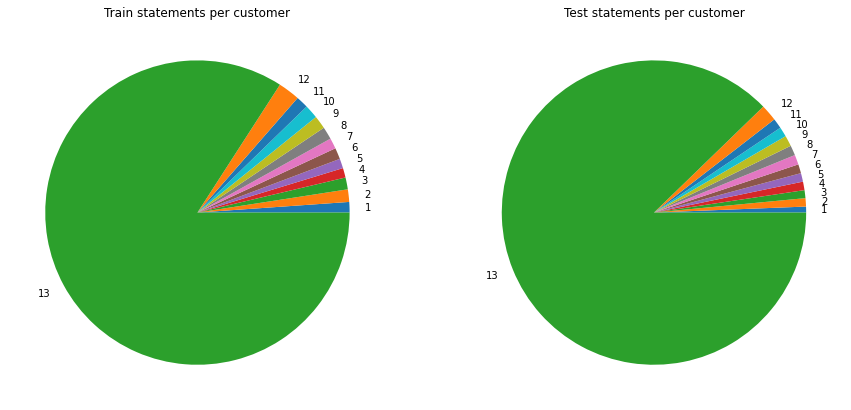

In [11]:
plt.figure(figsize=(15,10))
train_counts = train_data.customer_ID.value_counts().value_counts().sort_index()
plt.subplot(1,2,1)
plt.pie(train_counts, labels=train_counts.index)
plt.title('Train statements per customer')

test_counts = test_data.customer_ID.value_counts().value_counts().sort_index()
plt.subplot(1,2,2)
plt.pie(test_counts, labels=test_counts.index)
plt.title('Test statements per customer')
plt.show()

대부분의 customer(80%)이 13개의 statements를 가지고 있음을 알 수 있다.  
=> 즉, customer별로 variable-sized 입력을 처리해야한다.

customer의 마지막 statement를 알아보자.

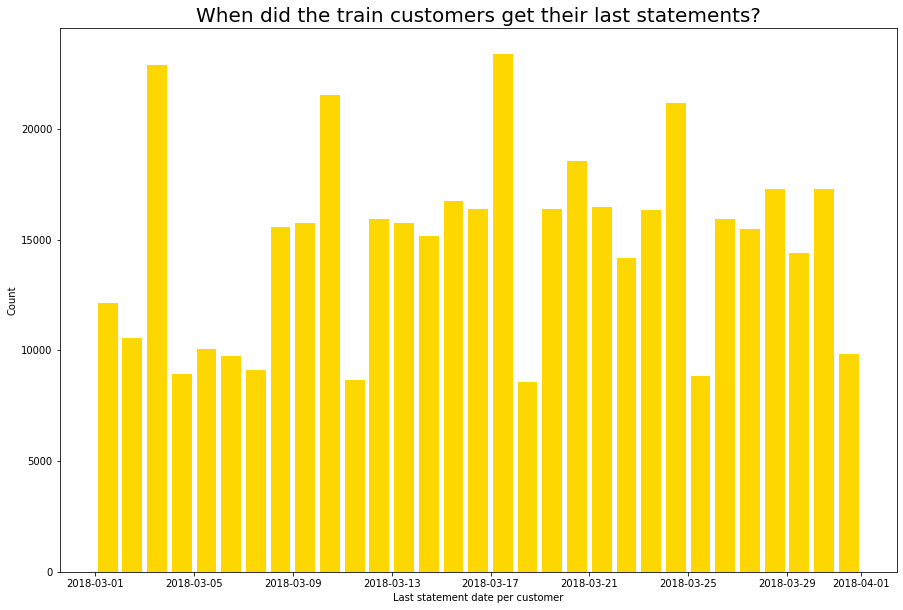

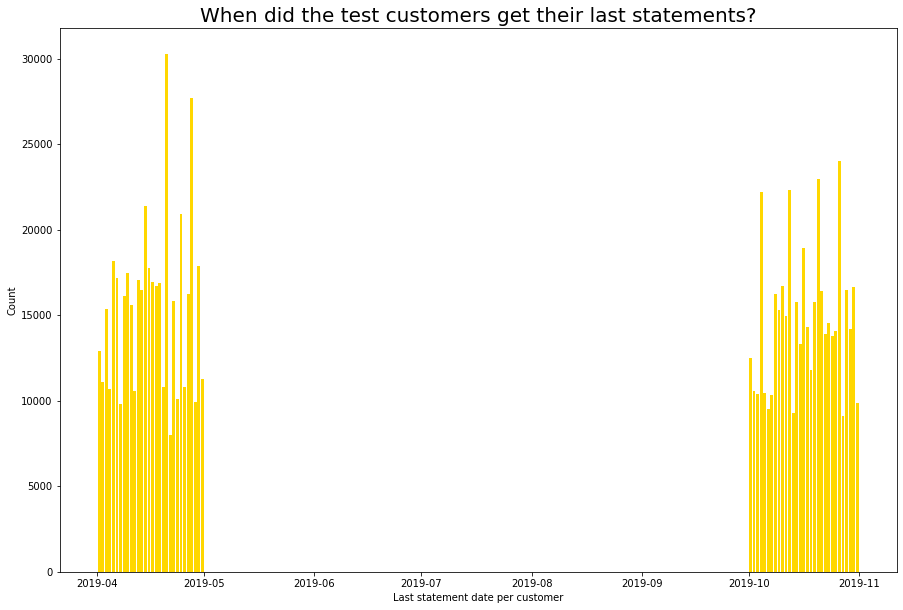

In [12]:
tmp = train_data.S_2.groupby(train_data.customer_ID).max()
plt.figure(figsize=(15,10))
plt.hist(tmp, bins=pd.date_range("2018-03-01", "2018-04-01", freq='d'), rwidth=0.8, color='#ffd700')
plt.title('When did the train customers get their last statements?', fontsize=20)
plt.xlabel('Last statement date per customer')
plt.ylabel('Count')
plt.show()
del tmp
tmp = test_data.S_2.groupby(test_data.customer_ID).max()
plt.figure(figsize=(15,10))
plt.hist(tmp, bins=pd.date_range("2019-04-01", "2019-11-01", freq='d'), rwidth=0.8, color='#ffd700')
plt.title('When did the test customers get their last statements?', fontsize=20)
plt.xlabel('Last statement date per customer')
plt.ylabel('Count')
plt.show()
del tmp

- train customer는 2018.03에 last statements 받음을 알 수 있고, 3월 3, 10, 17, 24일 (토요일)에 더 많은 statement가 있음을 알 수 있다.
- test customer는 2개로 나눠져 있다. [이 곳](https://www.kaggle.com/competitions/amex-default-prediction/discussion/327602)에서 논의 되었듯이 2019.04는 public, 2019.10은 private을 위해 사용될 데이터다.

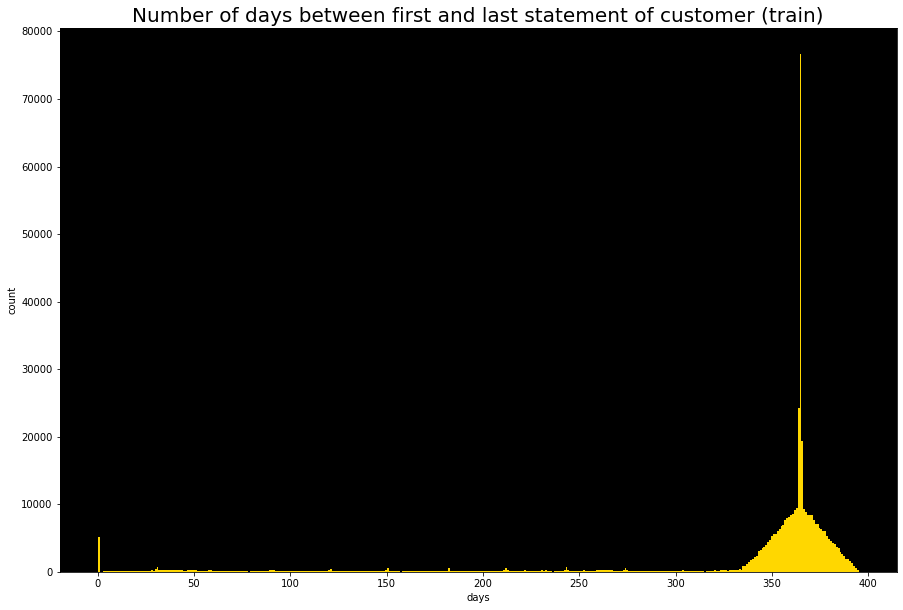

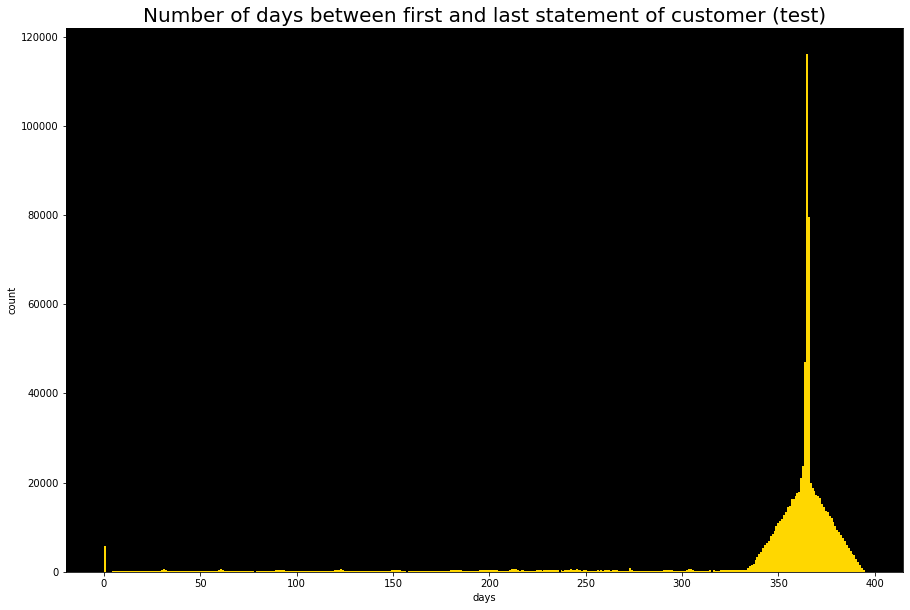

In [13]:
tmp = train_data.S_2.groupby(train_data.customer_ID).agg(['max', 'min'])
plt.figure(figsize=(15,10))

plt.hist((tmp['max'] - tmp['min']).dt.days, bins=400, color='#ffd700')
plt.xlabel('days')
plt.ylabel('count')
plt.title('Number of days between first and last statement of customer (train)', fontsize=20)
plt.gca().set_facecolor('#000000')
plt.show()
del tmp

tmp = test_data.S_2.groupby(test_data.customer_ID).agg(['max', 'min'])
plt.figure(figsize=(15,10))

plt.hist((tmp['max'] - tmp['min']).dt.days, bins=400, color='#ffd700')
plt.xlabel('days')
plt.ylabel('count')
plt.title('Number of days between first and last statement of customer (test)', fontsize=20)
plt.gca().set_facecolor('#000000')
plt.show()
del tmp


대부분의 고객의 첫 statement와 마지막 statement는 약 1년의 차이가 있다. 일반적으로 13개의 statements가 있다는 것은 매월 statement를 받았음을 나타낸다.

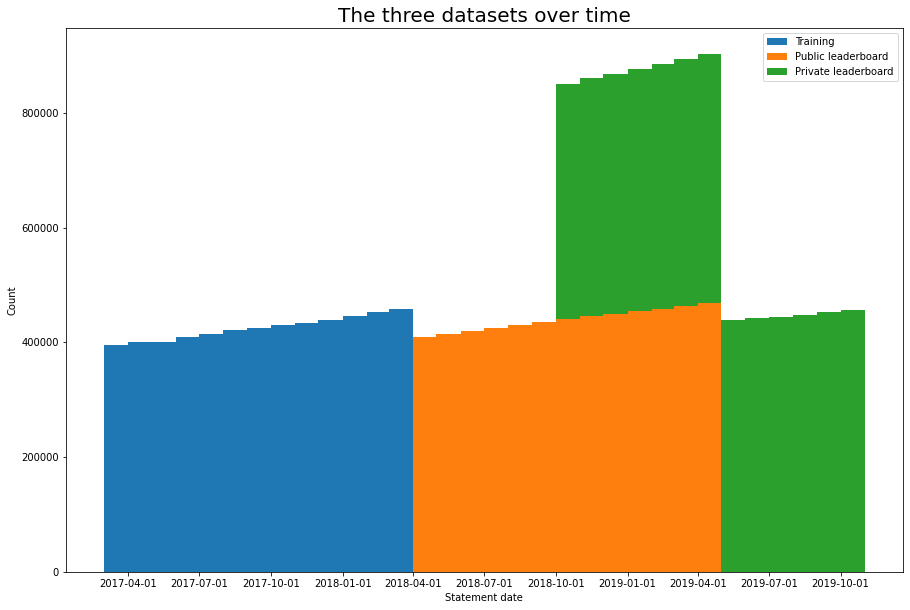

In [14]:
tmp = pd.concat([train_data[['customer_ID', 'S_2']], test_data[['customer_ID', 'S_2']]], axis=0)
tmp.set_index('customer_ID', inplace=True)
tmp['last_month'] = tmp.groupby('customer_ID').S_2.max().dt.month
last_month = tmp['last_month'].values

plt.figure(figsize=(15,10))
plt.hist([tmp.S_2[tmp.last_month==3],
          tmp.S_2[tmp.last_month==4],
          tmp.S_2[tmp.last_month==10]],
         bins=pd.date_range('2017-03-01', '2019-11-01', freq='MS'),
         label=['Training', 'Public leaderboard', 'Private leaderboard'],
         stacked=True)
plt.xticks(pd.date_range('2017-03-01', '2019-11-01', freq='QS'))
plt.xlabel('Statement date')
plt.ylabel('Count')
plt.title('The three datasets over time', fontsize=20)
plt.legend()
plt.show()

- 데이터셋별로 13개월씩 이뤄짐을 알 수 있다.
- Public leaderboard와 Private leaderboard가 겹침을 볼 수 있다.